# Prosper Loans Data Exploration through Visualizations

## by Christopher Toromo

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 

The data set can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv) and the variable descriptions 
can be found [here](https://docs.google.com/spreadsheets/u/0/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing).


## Preliminary Wrangling


In [103]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [104]:
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'

df = pd.read_csv(url)

### Assessing the Data

In [105]:
# Checking the first 5 rows of the dataset

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [106]:
# Checking the shape of the dataset

print(f'We have {df.shape[0]} rows and {df.shape[1]} columns in our dataset')

We have 113937 rows and 81 columns in our dataset


In [107]:
# Checking the data types of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [108]:
# Descriptive statistics for numeric variables

df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of our dataset?

> We have 113937 rows and 81 columns in our dataset

### What is/are the main feature(s) of interest in our dataset?

> **LoanStatus,EstimatedLoss,EstimatedReturn**

### What features in the dataset do you think will help support our investigation into our feature(s) of interest?

> **Term,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange**

## Univariate Exploration


#### Categorical Variables

In [109]:
# Selecting the categorical columns for features that are of interest


cat_col = ['ListingCategory (numeric)', 'EmploymentStatus', 'Occupation', 'IncomeRange', 'LoanStatus','BorrowerState']

categorical = df[cat_col]

categorical.head()

,ListingCategory (numeric),EmploymentStatus,Occupation,IncomeRange,LoanStatus,BorrowerState
0,0,Self-employed,Other,"$25,000-49,999",Completed,CO
1,2,Employed,Professional,"$50,000-74,999",Current,CO
2,0,Not available,Other,Not displayed,Completed,GA
3,16,Employed,Skilled Labor,"$25,000-49,999",Current,GA
4,2,Employed,Executive,"$100,000+",Current,MN


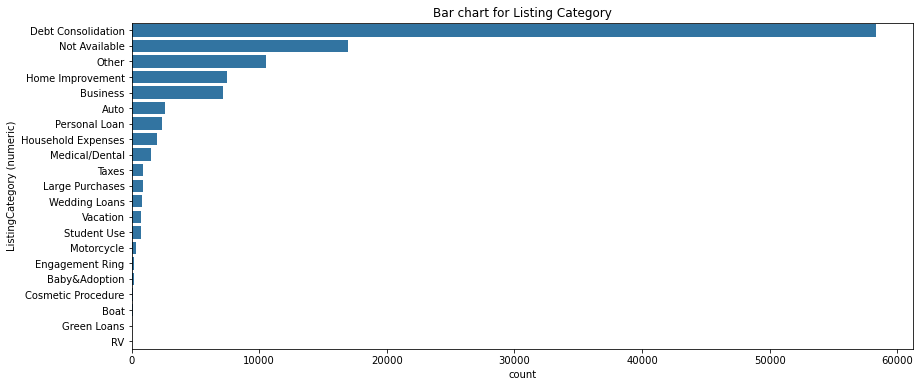

In [200]:
# Bar chart for the ListingCategory (numeric) variable

# We shall start converting the numeric values to their corresponding categories

listing_category_values = {0: 'Not Available', 1: 'Debt Consolidation', 2: 
    'Home Improvement', 3: 'Business', 4: 'Personal Loan', 
    5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 
    9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 
    12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 
    15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 
    19: 'Vacation', 20: 'Wedding Loans'}

for i in listing_category_values:
    categorical['ListingCategory (numeric)'] = categorical['ListingCategory (numeric)'].replace(i, listing_category_values[i])

lis_order = categorical['ListingCategory (numeric)'].value_counts().index

plt.figure(figsize = [14, 6])

sb.countplot(data = categorical, y = 'ListingCategory (numeric)', color = sb.color_palette()[0], 
             order=lis_order)
plt.title('Bar chart for Listing Category');

**From the above we can clear see that most people usually request loan to consolidate other current loans they have.**

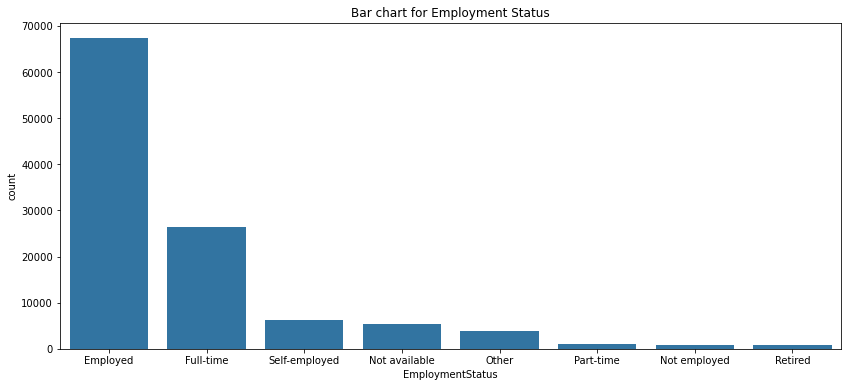

In [198]:
# Bar chart for the EmploymentStatus variable

emp_order = categorical['EmploymentStatus'].value_counts().index

plt.figure(figsize = [14, 6])

sb.countplot(data = categorical, x = 'EmploymentStatus', color = sb.color_palette()[0],
             order=emp_order)
plt.title('Bar chart for Employment Status');


**We can clearly tell that most employed people are the ones requesting for loans and the retirees are the least.**

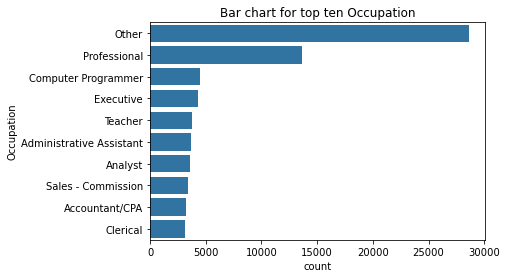

In [112]:
# Bar chart for the Occupation variable for the top 10 occupations

occ_order = categorical['Occupation'].value_counts().index

sb.countplot(data = categorical, y = 'Occupation', color = sb.color_palette()[0],
             order=occ_order[:10])
plt.title('Bar chart for top ten Occupation');


**People on un-categorized job profession are the once requesting most loans.**

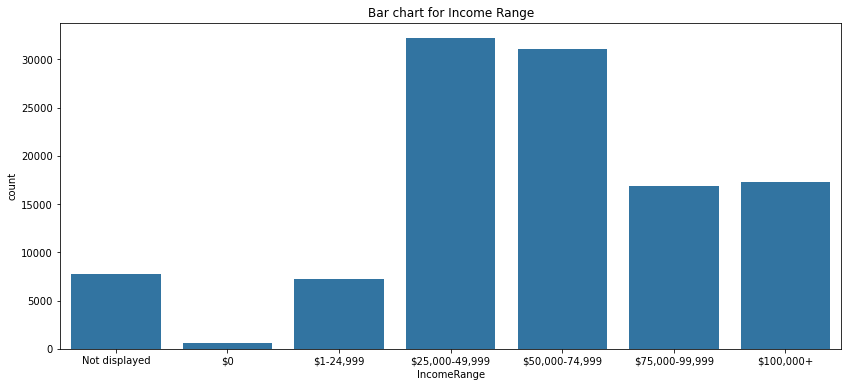

In [197]:
# Bar chart for the IncomeRange variable

# We shall order the income range from lowest to highest

income_order = ['Not displayed', '$0', '$1-24,999', '$25,000-49,999', 
                '$50,000-74,999', '$75,000-99,999', '$100,000+']

# Plotting the bar chart

plt.figure(figsize = [14, 6])

sb.countplot(data = categorical, x = 'IncomeRange', color = sb.color_palette()[0],
             order=income_order)
plt.title('Bar chart for Income Range');

**From the above observation, we can easily tell that people on mid-range salary levels are the ones requesting most loans.**

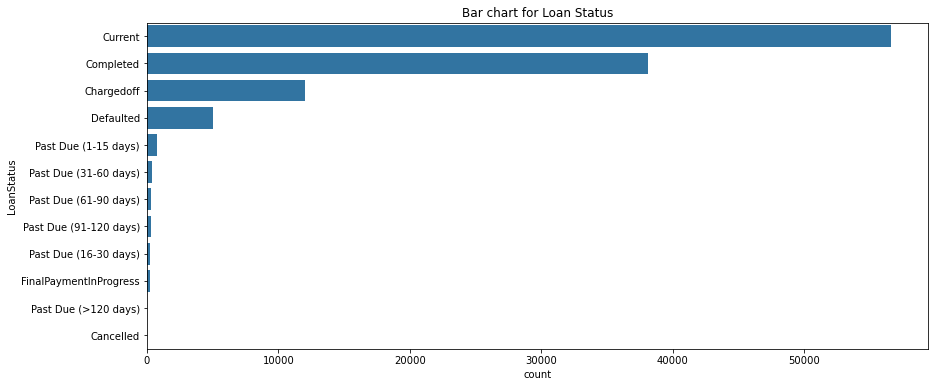

In [195]:
# Bar chart for the LoanStatus variable

plt.figure(figsize = [14, 6])

sb.countplot(data = categorical, y = 'LoanStatus', color = sb.color_palette()[0],
             order=categorical['LoanStatus'].value_counts().index)
plt.title('Bar chart for Loan Status');

**From the above we can tell the most loans are still active.**

#### Numerical Variables

In [115]:
# Selecting the numeric columns for features that are of interest

numeric_col = ['Term','BorrowerAPR','BorrowerRate','EstimatedLoss','EstimatedReturn',
               'EmploymentStatusDuration','CreditScoreRangeLower','CreditScoreRangeUpper']

numeric = df[numeric_col]
numeric.head()

,Term,BorrowerAPR,BorrowerRate,EstimatedLoss,EstimatedReturn,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper
0,36,0.16516,0.1580,NaN,NaN,2.0,640.0,659.0
1,36,0.12016,0.0920,0.0249,0.05470,44.0,680.0,699.0
2,36,0.28269,0.2750,NaN,NaN,NaN,480.0,499.0
3,36,0.12528,0.0974,0.0249,0.06000,113.0,800.0,819.0
4,36,0.24614,0.2085,0.0925,0.09066,44.0,680.0,699.0


In [116]:
# Removing the rows with missing values

numeric = numeric.dropna()
numeric.isnull().sum()

Term                        0
BorrowerAPR                 0
BorrowerRate                0
EstimatedLoss               0
EstimatedReturn             0
EmploymentStatusDuration    0
CreditScoreRangeLower       0
CreditScoreRangeUpper       0
dtype: int64

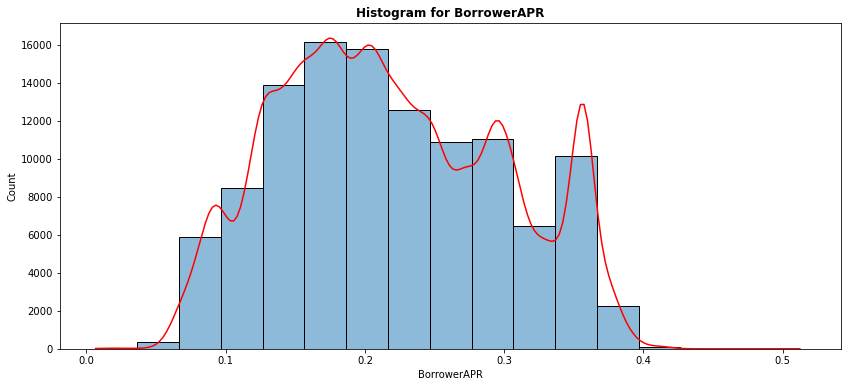

In [202]:
# Histogram for the BorrowerAPR variable

def column(x, bins='auto',binwidth=None):
    ''' This function takes in a column name and plots a histogram for the column
        Inputs: Column name
        Output: Histogram for the column   
    '''
    ax = sb.histplot(data = df, x=x, kde=True, bins=bins, binwidth=binwidth)
    ax.lines[0].set_color('red')
    plt.title('Histogram for {}'.format(x), weight='bold')
    plt.xlabel('{}'.format(x));

plt.figure(figsize = [14, 6])
    
column('BorrowerAPR', binwidth=0.03)

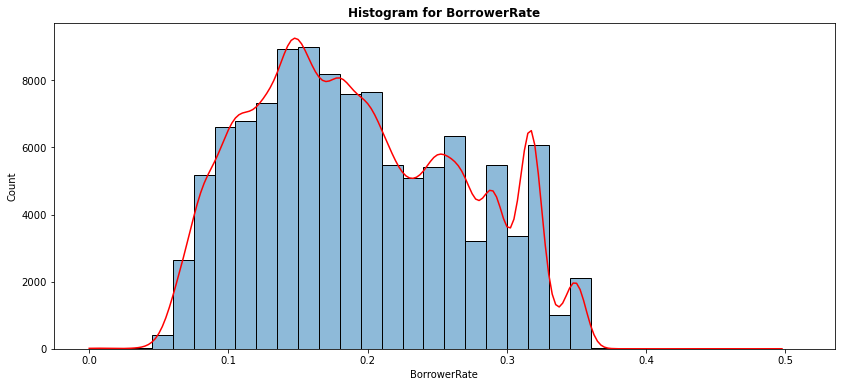

In [201]:
# Histogram for the BorrowerRate variable

plt.figure(figsize = [14, 6])

column('BorrowerRate', binwidth=0.015)

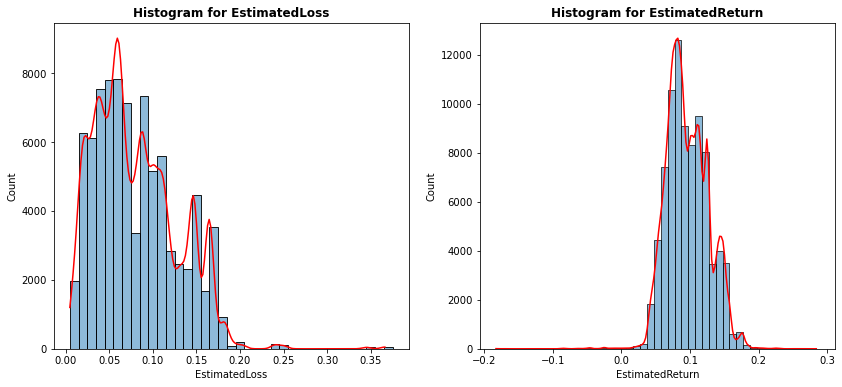

In [203]:
# Histogram for the EstimatedLoss variable and EstimatedReturn variable

plt.figure(figsize = [14, 6])

plt.subplot(1, 2, 1)

column('EstimatedLoss', binwidth=0.01)

plt.subplot(1, 2, 2)

column('EstimatedReturn', binwidth=0.01)


#### Feature Engineering

In [126]:
# We shall create a new column of the average credit score

numeric['average_credit_score'] = (numeric['CreditScoreRangeLower'] + numeric['CreditScoreRangeUpper'])/2

numeric.average_credit_score.head()

1    689.5
3    809.5
4    689.5
5    749.5
6    689.5
Name: average_credit_score, dtype: float64

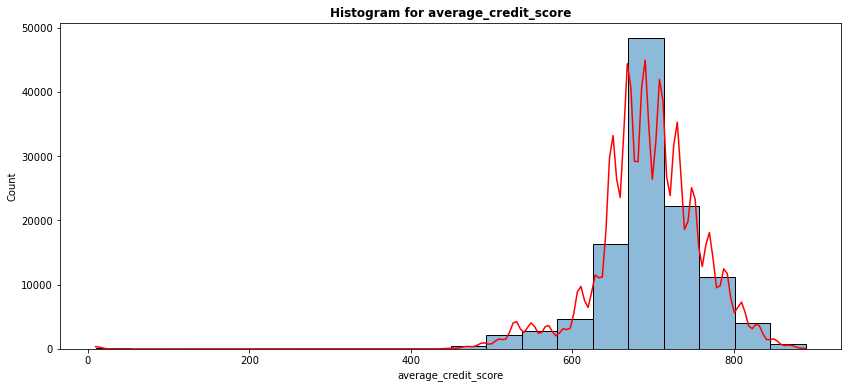

In [204]:
# Histogram for the average_credit_score variable

plt.figure(figsize = [14, 6])

column('average_credit_score', bins=20)

**We can easily see that the most loans are requested by people with a credit score of 700. Also the credit score rating is skewed to the left.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

We needed to transform the CreditScoreRangeLower and CreditScoreRangeUpper to a single variable. This was done by taking the mean of the two variables. The new variable was named average_credit_score and it enabled us to come with a better visualization.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Some columns had missing values and we had to drop them since they could have affected our analysis. Also, we had to drop some columns that we were not going to use in our analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [158]:
# To reduce overplotting, we shall use a create a sample of the dataset

np.random.seed(1)
sample = np.random.choice(df.shape[0], 1000, replace=False)
loan_samp = df.loc[sample]
loan_samp

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,average_credit_score
101763,D2FE357759653832169BC4D,774925,2013-05-09 21:52:43.950000000,NaN,60,Current,NaN,0.24282,0.2179,0.2079,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,54,689.5
22630,C9AE3467359156204FB14DC,431188,2009-10-30 23:24:14.883000000,NaN,36,Defaulted,2011-06-15 00:00:00,0.27306,0.2500,0.2400,...,-102.0,2351.88,2351.87,100.0,1.0,0,0,0.0,182,649.5
69656,E43835361203260370049B1,549543,2012-01-06 14:42:46.210000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1,689.5
3465,2BE33421635614762C0CB2F,331237,2008-05-12 15:40:05.337000000,B,36,Completed,2010-04-06 00:00:00,0.15377,0.1395,0.1295,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,247,689.5
17029,D09334784686488855E6A5E,449988,2010-03-11 19:01:00.167000000,NaN,36,Completed,2012-04-09 00:00:00,0.13321,0.1120,0.1020,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,530,769.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61561,26A533887313360329BB4B4,133697,2007-05-07 06:34:02.307000000,HR,36,Completed,2010-06-04 00:00:00,0.30168,0.2900,0.2600,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,44,529.5
78478,D8A03600130371363CFEBE5,1152029,2014-01-22 09:43:31.117000000,NaN,36,Current,NaN,0.19859,0.1620,0.1520,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1,649.5
37563,103B36002725491878567E3,1113064,2014-01-16 05:51:49.257000000,NaN,60,Current,NaN,0.19860,0.1745,0.1645,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1,709.5
78453,48303589070787987445905,915471,2013-09-20 18:18:02.703000000,NaN,60,Current,NaN,0.19323,0.1695,0.1595,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1,729.5


#### i). Quantitative vs Quantitative

We shall plot scatter plots to see the relationship between the quantitative variables.

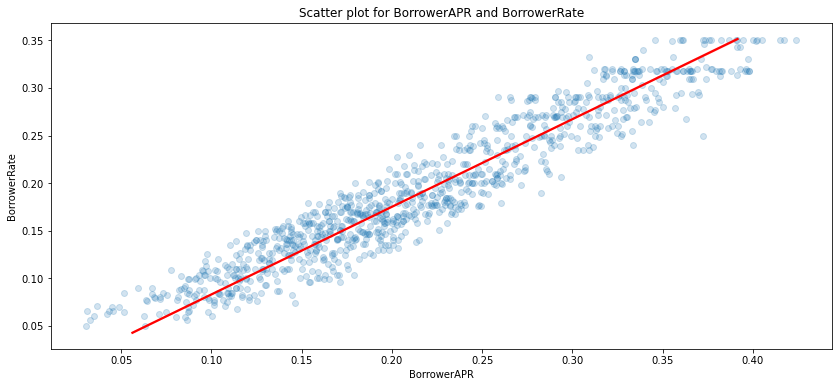

In [172]:
# Scatter plot for the BorrowerAPR and BorrowerRate variables

plt.figure(figsize=[14, 6])


sb.regplot(data = loan_samp, x = 'BorrowerAPR', y = 'BorrowerRate', 
            line_kws={'color':'red'}, x_jitter=0.04, scatter_kws={'alpha':1/5})
plt.title('Scatter plot for BorrowerAPR and BorrowerRate');
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate');

**We can clearly see that the The Borrower's Annual Percentage Rate (APR) for the loan is directly proportional to the The Borrower's interest rate for this loan.**

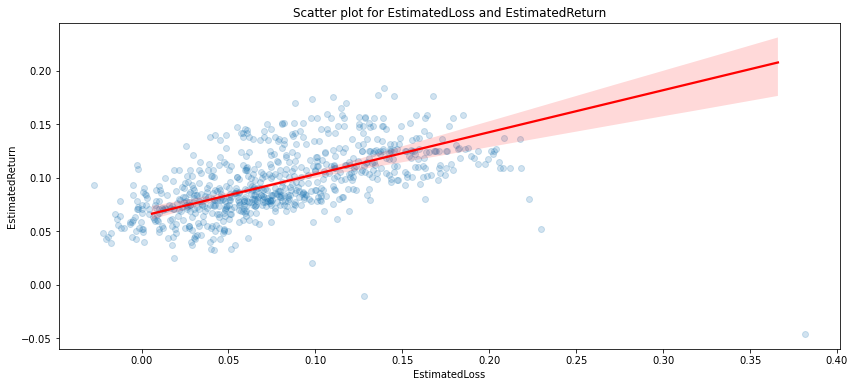

In [173]:
# Scatter plot for the EstimatedLoss and EstimatedReturn variables

plt.figure(figsize=[14, 6])

sb.regplot(data = loan_samp, x = 'EstimatedLoss', y = 'EstimatedReturn',
             fit_reg=True, line_kws={'color':'red'}, x_jitter=0.04, scatter_kws={'alpha':1/5})
plt.title('Scatter plot for EstimatedLoss and EstimatedReturn')
plt.xlabel('EstimatedLoss')
plt.ylabel('EstimatedReturn');


**We can clear see the with increase in Estimated Loss, there is also increase in return from the loan but until when the estimated loss is over 20%, where it starts to reduce the estimated returns.**

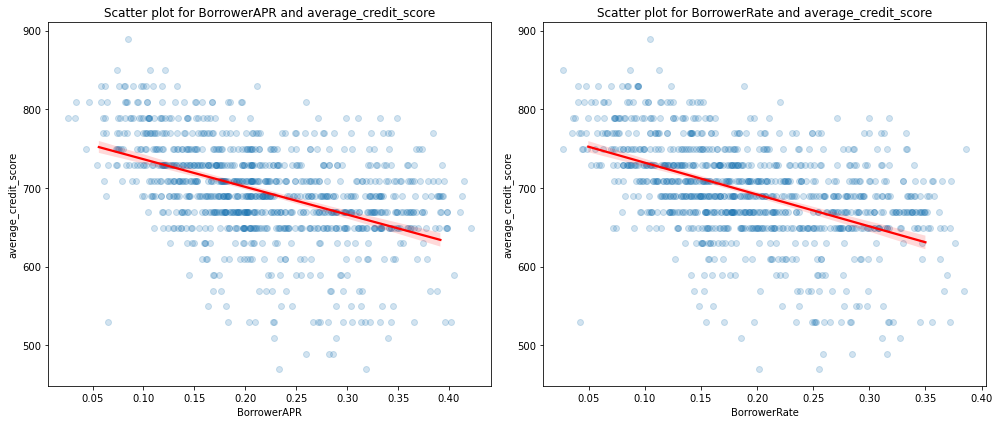

In [183]:
# Scatter plots for the BorrowerAPR and average_credit_score vs BorrowerRate and  variables

plt.figure(figsize=[14, 6])

plt.subplot(1, 2, 1)

sb.regplot(data = loan_samp, x = 'BorrowerAPR', y = 'average_credit_score', scatter_kws={'alpha':1/5},
           line_kws={'color':'red'}, x_jitter=0.04)
plt.title('Scatter plot for BorrowerAPR and average_credit_score')
plt.xlabel('BorrowerAPR')
plt.ylabel('average_credit_score');

plt.subplot(1, 2, 2)

sb.regplot(data = loan_samp, x = 'BorrowerRate', y = 'average_credit_score', scatter_kws={'alpha':1/5},
           line_kws={'color':'red'}, x_jitter=0.04)
plt.title('Scatter plot for BorrowerRate and average_credit_score')
plt.xlabel('BorrowerRate')
plt.ylabel('average_credit_score')
plt.tight_layout();

**We can clear see that the higher the credit score of a person, the lower the interest rate on the loan.**

### ii). Qualitative vs Qualitative

We shall use clustered bar charts to see the relationship between the qualitative variables.

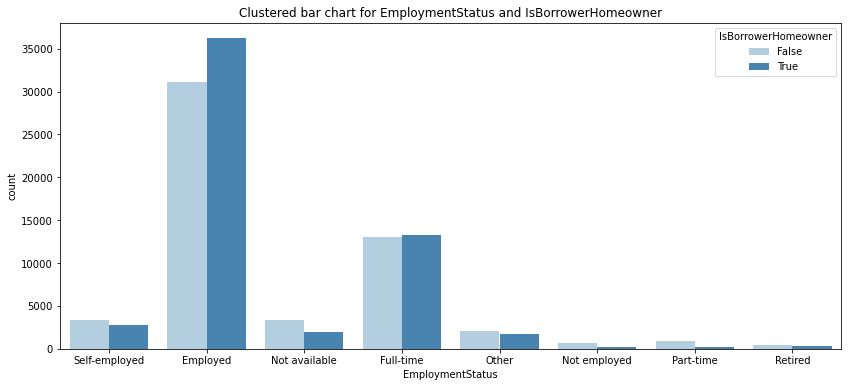

In [189]:
# Clustered bar chart for the EmploymentStatus and IsBorrowerHomeowner variables

plt.figure(figsize=[14, 6])

sb.countplot(data = df, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = 'Blues')
plt.xticks(rotation = 0)
plt.title('Clustered bar chart for EmploymentStatus and IsBorrowerHomeowner');

**We can clearly see that most employed people requesting for the loan are also homeowners.**

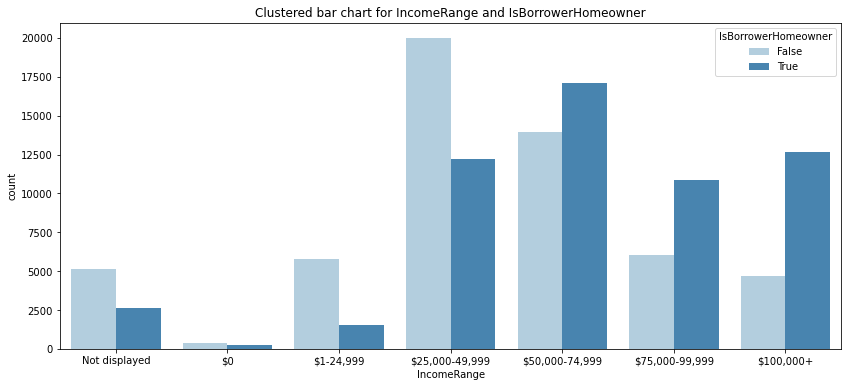

In [188]:
# Clustered bar chart for the IncomeRange and IsBorrowerHomeowner variables

plt.figure(figsize=[14, 6])

sb.countplot(data = df, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', palette = 'Blues',
             order=income_order)
plt.xticks(rotation = 0)
plt.title('Clustered bar chart for IncomeRange and IsBorrowerHomeowner');

**We can also see that most people with higher income levels (i.e $50000 and above) are also homeowners.**

### iii). Quantitative vs Qualitative

We shall use violin plots and box plots to see the relationship between the quantitative and qualitative variables.

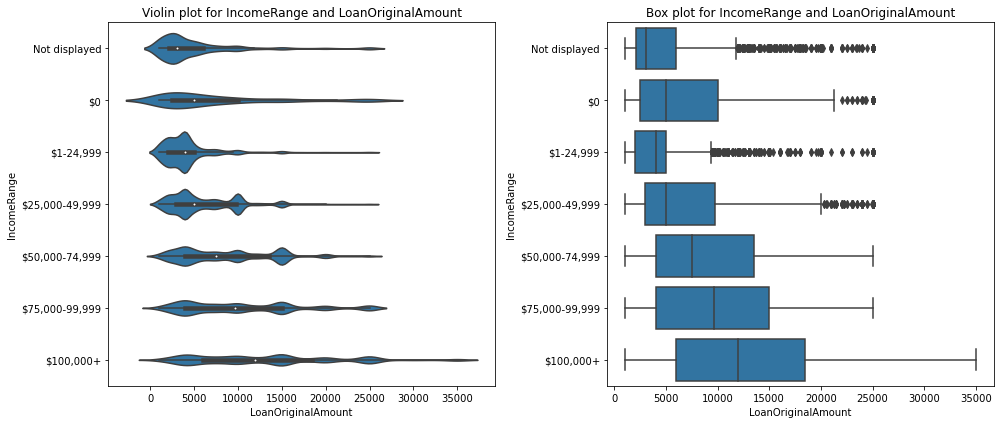

In [211]:
# Violin plot and box plot for the IncomeRange and LoanStatus variables

plt.figure(figsize=[14, 6])

plt.subplot(1, 2, 1)

sb.violinplot(data = df, y = 'IncomeRange', x = 'LoanOriginalAmount', color = sb.color_palette()[0],
              order=income_order)
plt.title('Violin plot for IncomeRange and LoanOriginalAmount');

plt.subplot(1, 2, 2)

sb.boxplot(data = df, y = 'IncomeRange', x = 'LoanOriginalAmount', color = sb.color_palette()[0],
           order=income_order)
plt.title('Box plot for IncomeRange and LoanOriginalAmount')
plt.tight_layout();

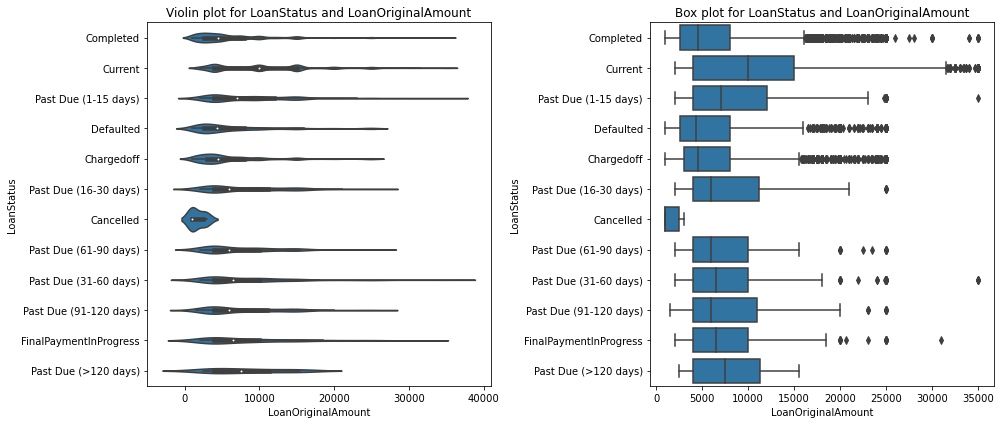

In [210]:
# Violin plot and box plot for the LoanStatus and LoanOriginalAmount variables

plt.figure(figsize = [14, 6])

plt.subplot(1, 2, 1)

sb.violinplot(data = df, y = 'LoanStatus', x = 'LoanOriginalAmount', color = sb.color_palette()[0])
plt.title('Violin plot for LoanStatus and LoanOriginalAmount');

plt.subplot(1, 2, 2)

sb.boxplot(data = df, y = 'LoanStatus', x = 'LoanOriginalAmount', color = sb.color_palette()[0])
plt.title('Box plot for LoanStatus and LoanOriginalAmount')
plt.tight_layout();

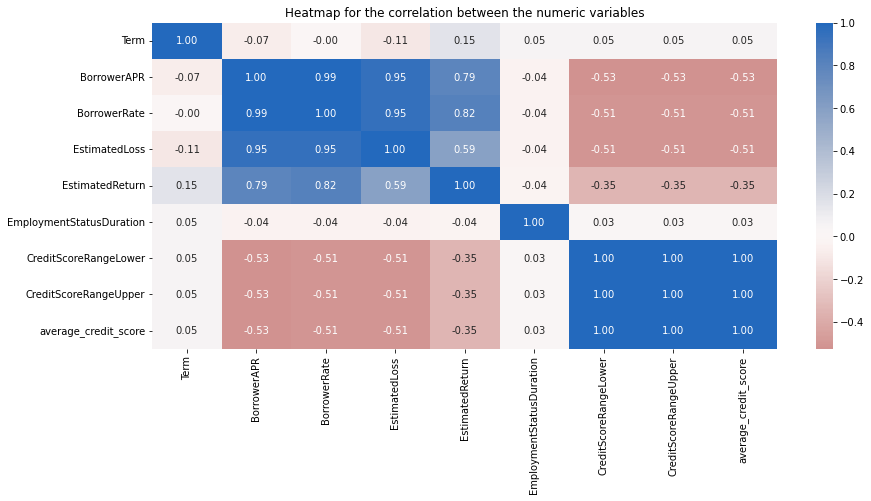

In [178]:
# Heatmap for the correlation between the numeric variables

plt.figure(figsize=[14, 6])

sb.heatmap(numeric.corr(), annot = True, fmt = '.2f',
           cmap='vlag_r', center=0)
plt.title('Heatmap for the correlation between the numeric variables');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We can clearly see that the loan status is directly proportional to the estimated loss and estimated return. Also, we can see that the higher the credit score of a person, the lower the interest rate on the loan. We can also see that most employed people requesting for the loan are also homeowners. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  The higher the borrowers annual percentage rate (APR) for the loan, the higher the Estimated Loss and Estimated Return. 

## Multivariate Exploration

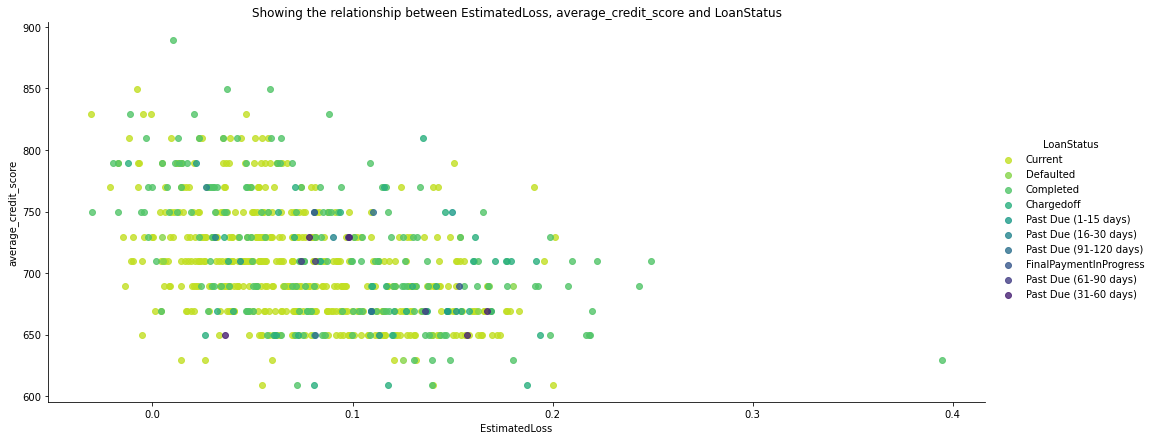

In [187]:
# Showing the relationship between BorrowerAPR, EstimatedLoss and LoanStatus
g = sb.FacetGrid(data=loan_samp,hue='LoanStatus',
                  palette='viridis_r')

g.fig.set_size_inches(14, 6)

g.map(sb.regplot, 'EstimatedLoss', 'average_credit_score',
                x_jitter=0.04, fit_reg=False);
g.add_legend()
plt.title('Showing the relationship between EstimatedLoss, average_credit_score and LoanStatus');
plt.xlabel('EstimatedLoss')
plt.ylabel('average_credit_score');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We have more loans on current status and they tend to have lower estimated loss. 

### Were there any interesting or surprising interactions between features?

From the sample data, we have on case where the credit score is over 800 and yet the loan status is past due date. 

## Conclusions

* We have more loans on current status and they tend to have lower estimated loss.
* The higher the borrowers annual percentage rate (APR) for the loan, the higher the Estimated Loss and Estimated Return.
* The higher the credit score of a person, the lower the interest rate on the loan.
* Most employed people requesting for the loan are also homeowners.
* Most people with higher income levels (i.e $50000 and above) are also homeowners.
* Most people requesting for the loan are on the mid-range salary levels.
* Most people requesting for the loan are on the employed status.
* Most people requesting for the loan are on the un-categorized job profession.
* Most people requesting for the loan to consolidate other current loans they have.